<h1> Setting up the environment </h1>

<h3> Installing the ultralytics library </h3>

In [203]:
# Install Essential Libraries
!pip install ultralytics

<h3> Important imports </h3>

In [204]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

<h1> Exploratory Data Analysis </h1>

In [205]:
Image_dir = 'datasets/train/images'
Label_dir = 'datasets/train/labels'

In [206]:
# Find the number of images and labels
image_filenames = glob.glob(f'{Image_dir}/*.jpg')
label_filenames = glob.glob(f'{Label_dir}/*.txt')

print(f'Number of Images: {len(image_filenames)}')
print(f'Number of Labels: {len(label_filenames)}')

Number of Images: 3530
Number of Labels: 3530


In [207]:
# print the size of the dataset
print(f"Number of images in the dataset: {len(image_filenames)}")

# print the dimensions of a random image
image = Image.open(image_filenames[random.randint(0, len(image_filenames))])
print(f"Image dimensions: {image.size}")


Number of images in the dataset: 3530
Image dimensions: (416, 416)


In [208]:
label_names = ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']

In [209]:
# loading the labels from the labels file
def load_labels(label_file):
    with open(label_file, 'r') as f:
        lines = f.readlines()
    return lines[0].strip().split() if len(lines) > 0 else lines

labels = []
# load the labels for the first image
for label_name in label_filenames:
    labels.append(load_labels(label_name))

In [210]:
print(f"Number of labels in the dataset: {len(labels)}")
for i in range(5):
    print(labels[i])
# print number of elements in labels that have a length of 0 with their indices
empty_labels = [i for i, label in enumerate(labels) if len(label) == 0]
print(f"Number of images without labels: {len(empty_labels)}")
print(empty_labels)

Number of labels in the dataset: 3530
['1', '0.4651442307692308', '0.4254807692307692', '0.03125', '0.020432692307692308']
['11', '0.5192307692307693', '0.4891826923076923', '0.6790865384615384', '0.6850961538461539']
['1', '0.6069711538461539', '0.34975961538461536', '0.11538461538461539', '0.05048076923076923']
['8', '0.296875', '0.5120192307692307', '0.0985576923076923', '0.07692307692307693']
['3', '0.5420673076923077', '0.4411057692307692', '0.32211538461538464', '0.4483173076923077']
Number of images without labels: 3
[643, 1842, 2569]


In [211]:
# true_labels = [label.split()[0] for label in labels]
# label_descs = [(float(item.split()[1]), float(item.split()[2]), float(item.split()[3])) for item in labels]

true_labels = []
label_descs = []

for i in range(len(labels)):
    if len(labels[i]) == 0:
        items = ['0', '0', '0', '0']
    else: items = labels[i]
    true_labels.append((int(items[0])))
    label_descs.append((float(items[1]), float(items[2]), float(items[3])))

In [212]:
print(len(true_labels))
print(len(label_descs))
print(len(image_filenames))

3530
3530
3530


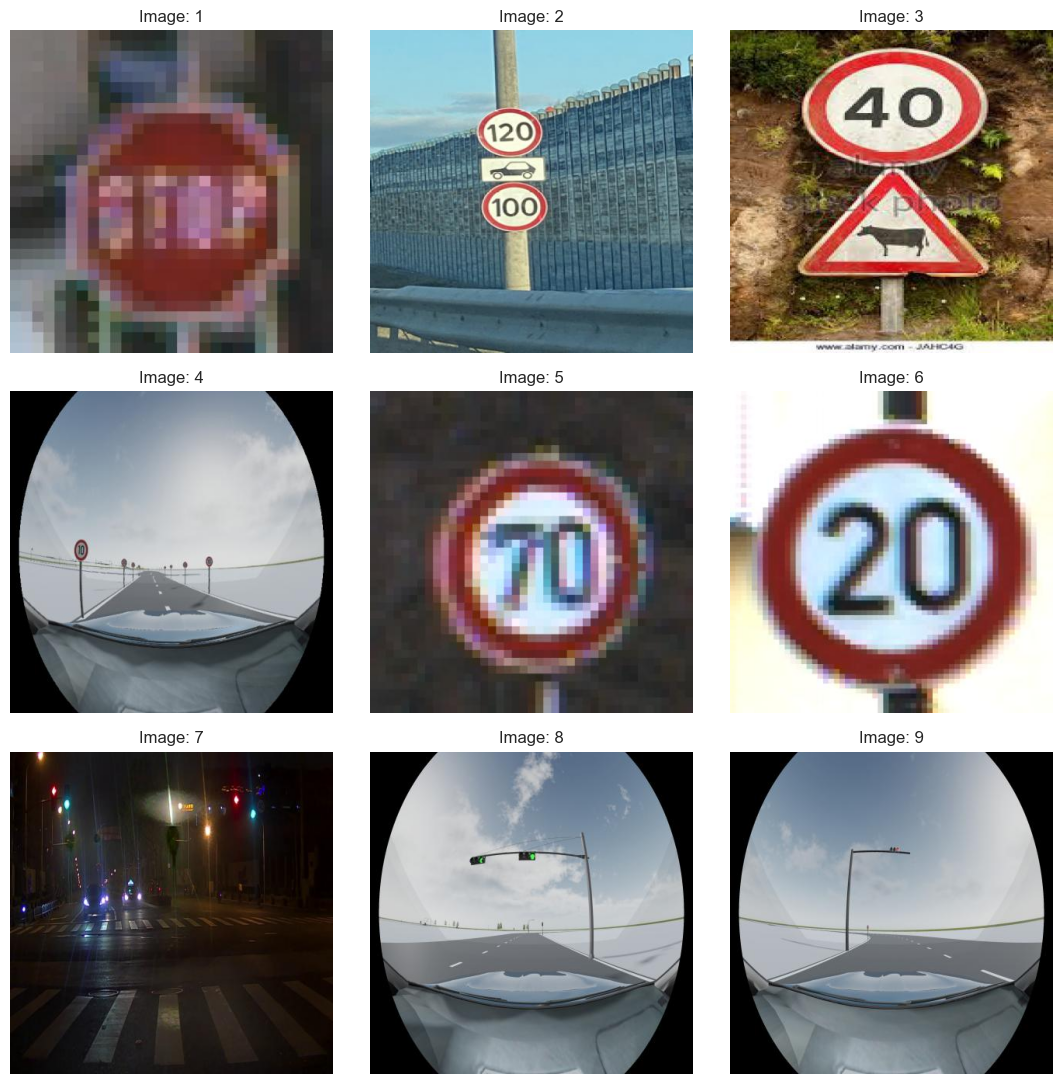

In [213]:
num_samples = 9

random_indices = random.sample(range(len(image_filenames)), num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

# enumerate the random indices and plot the images
for i, rand_idx in enumerate(random_indices):
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(image_filenames[rand_idx]))
    # set the title of the image as the label filename. The label is inside the label file. Access the file to print its contents
    

    ax.set_title(f'Image: {i + 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Testing the pretrained model on a few random images 


image 1/1 /Users/arvindtawker/Desktop/UCD/Junior-SpringQ/ECS174/ECS-174-Project/datasets/train/images/00004_00038_00010_png.rf.ccb068d57bc46d80e2e13f92a9dffca7.jpg: 416x416 (no detections), 123.8ms
Speed: 3.0ms preprocess, 123.8ms inference, 6.3ms postprocess per image at shape (1, 3, 416, 416)


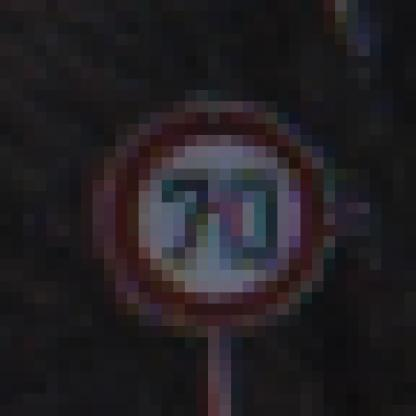


image 1/1 /Users/arvindtawker/Desktop/UCD/Junior-SpringQ/ECS174/ECS-174-Project/datasets/train/images/000157_jpg.rf.5333517eb0172e5cd4a2b8d64192dbe6.jpg: 416x416 (no detections), 93.9ms
Speed: 0.9ms preprocess, 93.9ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 416)


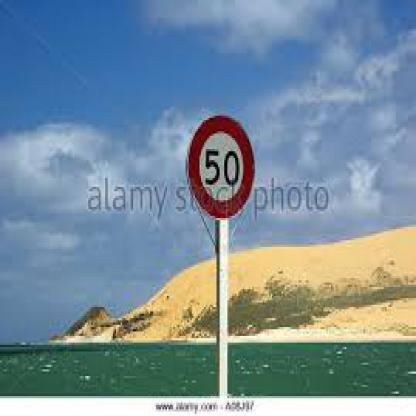


image 1/1 /Users/arvindtawker/Desktop/UCD/Junior-SpringQ/ECS174/ECS-174-Project/datasets/train/images/000981_JPG_jpg.rf.7bfe0d352b7648bf7ed24dcc1efaf780.jpg: 416x416 1 person, 4 cars, 1 motorcycle, 89.8ms
Speed: 0.9ms preprocess, 89.8ms inference, 6.2ms postprocess per image at shape (1, 3, 416, 416)


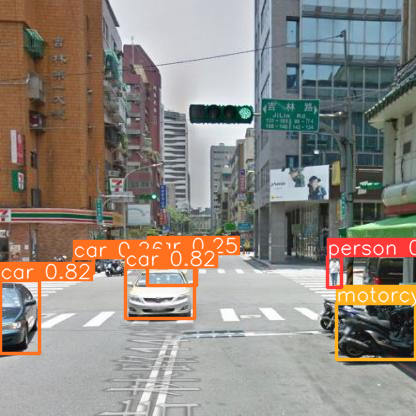


image 1/1 /Users/arvindtawker/Desktop/UCD/Junior-SpringQ/ECS174/ECS-174-Project/datasets/train/images/19bafd1c-1c51-4c01-adb1-efae9a9a3acc_jpg.rf.3384edc0e5e0fcad10a4b179747eb465.jpg: 416x416 (no detections), 79.7ms
Speed: 0.8ms preprocess, 79.7ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 416)


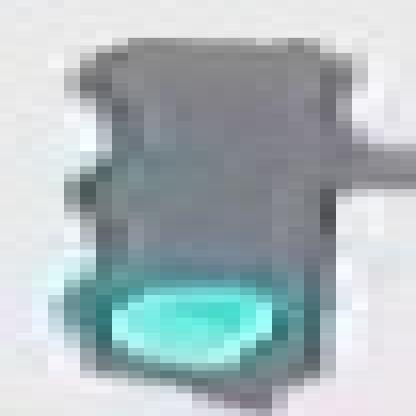


image 1/1 /Users/arvindtawker/Desktop/UCD/Junior-SpringQ/ECS174/ECS-174-Project/datasets/train/images/road744_png.rf.760844ea2f55e8607cf47bf198efb6f7.jpg: 416x416 (no detections), 89.6ms
Speed: 0.9ms preprocess, 89.6ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 416)


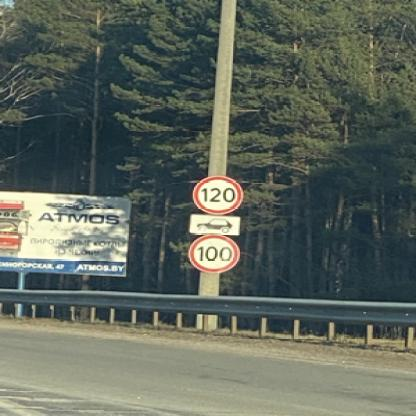

In [214]:
model = YOLO('yolov8n.pt')

# Select 5 random images
rand_images = random.sample(image_filenames, 5)

# Use the model to detect object in each image
for image in rand_images:
    result_predict = model.predict(source = image, imgsz=(416))

    # show results
    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(plot))

Training a model on the dataset

In [215]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="datasets/data.yaml",epochs=2, imgsz = 416, batch = 32 ,lr0=0.0001, dropout= 0.15)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.28 🚀 Python-3.10.9 torch-2.3.0 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=datasets/data.yaml, epochs=2, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

train: Scanning /Users/arvindtawker/Desktop/UCD/Junior-SpringQ/ECS174/ECS-174-Project/datasets/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]
val: Scanning /Users/arvindtawker/Desktop/UCD/Junior-SpringQ/ECS174/ECS-174-Project/datasets/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]

Plotting labels to runs/detect/train9/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/train9
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2         0G     0.8095      3.234      1.074         21        416: 100%|██████████| 111/111 [20:02<00:00, 10.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [03:00<00:00, 13.86s/it]

                   all        801        944      0.255       0.41      0.206      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2         0G     0.7033      2.213      1.005         17        416: 100%|██████████| 111/111 [21:31<00:00, 11.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:58<00:00,  9.10s/it]

                   all        801        944      0.288      0.522      0.338      0.284



2 epochs completed in 0.778 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 6.2MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.9 torch-2.3.0 CPU (Apple M1)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:53<00:00,  8.70s/it]


                   all        801        944       0.29      0.526      0.338      0.284
           Green Light         87        122      0.306        0.5      0.316      0.169
             Red Light         74        108      0.291      0.509      0.267       0.15
       Speed Limit 100         52         52      0.277      0.148      0.258      0.226
       Speed Limit 110         17         17      0.435      0.319      0.274      0.244
       Speed Limit 120         60         60       0.23      0.567      0.278      0.249
        Speed Limit 20         56         56       0.28      0.893      0.745      0.659
        Speed Limit 30         71         74      0.145       0.73       0.23      0.209
        Speed Limit 40         53         55       0.26        0.6      0.384      0.319
        Speed Limit 50         68         71      0.154      0.465      0.142      0.123
        Speed Limit 60         76         76      0.192      0.592      0.221      0.197
        Speed Limit 7